In [22]:
import pandas as pd

df = pd.read_csv("https://explore-education-statistics.service.gov.uk/data-catalogue/data-set/2f6bffba-735d-4801-8ae3-f0f058044da4/csv")

In [24]:
df_maths_gender = df[(df['time_period'].isin([201516, 201617, 201718, 201819, 201920, 202021, 202122, 202223])) & (df['subject_name'] == 'Maths')]

In [25]:
df_maths_gender.head()

,time_period,time_identifier,geographic_level,country_code,country_name,data_version,subject_name,characteristic_value,perc_astar_grade_achieved,perc_astar_a_grade_achieved,perc_astar_b_grade_achieved,perc_astar_c_grade_achieved,perc_astar_d_grade_achieved,perc_astar_e_grade_achieved,entry_count
1647,201516,Academic year,National,E92000001,England,Final,Maths,All students,19,44.0,66,82,93,99,79097
1648,201617,Academic year,National,E92000001,England,Final,Maths,All students,19,44.0,66,82,93,99,81893
1649,201718,Academic year,National,E92000001,England,Revised,Maths,All students,16.8,44.1,66.8,82.7,92.7,98.1,85115
1650,201819,Academic year,National,E92000001,England,Revised,Maths,All students,16.9,41.4,59.2,75.7,88.9,97,82446
1651,201920,Academic year,National,E92000001,England,Final,Maths,All students,24,50.6,70.7,86.7,95.5,99.5,85091


In [26]:
columns_to_keep = ['time_period', 'subject_name', 'characteristic_value', 'entry_count']  

df_maths_gender_filtered = df_maths_gender[columns_to_keep]

In [27]:
df_maths_gender_filtered.head()

,time_period,subject_name,characteristic_value,entry_count
1647,201516,Maths,All students,79097
1648,201617,Maths,All students,81893
1649,201718,Maths,All students,85115
1650,201819,Maths,All students,82446
1651,201920,Maths,All students,85091


In [32]:
import matplotlib.pyplot as plt
df_maths_gender_filtered = df_maths_gender[df_maths_gender['characteristic_value'].isin(['Female', 'Male'])]
gender_counts = df_maths_gender_filtered.groupby(['time_period', 'characteristic_value'])['entry_count'].sum().unstack()
gender_counts.index = gender_counts.index.astype(str).str[:4] + '/' + gender_counts.index.astype(str).str[4:]

<Figure size 1200x600 with 0 Axes>

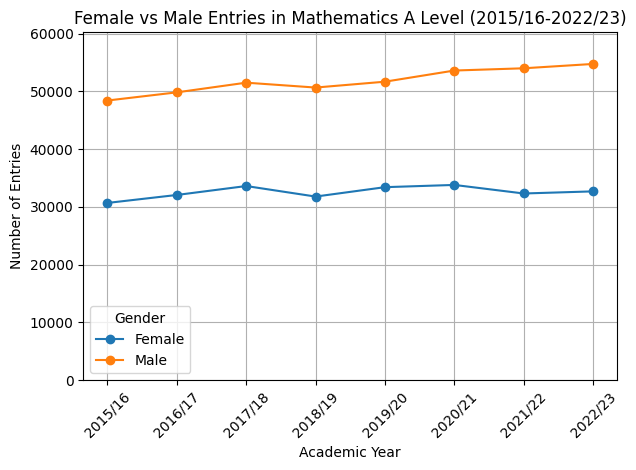

In [51]:
plt.figure(figsize=(12, 6))
gender_counts.plot(kind='line', marker='o')
plt.title('Female vs Male Entries in Mathematics A Level (2015/16-2022/23)')
plt.xlabel('Academic Year')
plt.ylabel('Number of Entries')
plt.ylim(ymin=0, ymax=gender_counts.max().max() * 1.1)
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid()
plt.tight_layout()
plt.show()

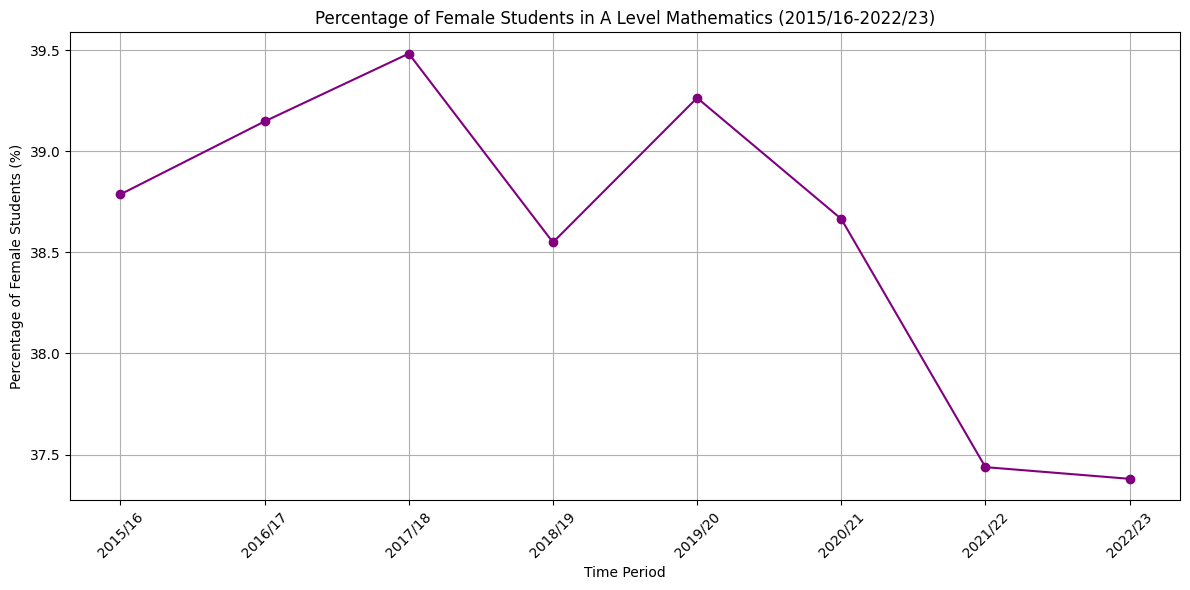

In [54]:
total_entries = df_maths_gender[df_maths_gender['characteristic_value'] == 'All students'].groupby('time_period')['entry_count'].sum()
female_entries = df_maths_gender[df_maths_gender['characteristic_value'] == 'Female'].groupby('time_period')['entry_count'].sum()

percentage_female = (female_entries / total_entries) * 100

percentage_female.index = percentage_female.index.astype(str).str[:4] + '/' + percentage_female.index.astype(str).str[4:]

plt.figure(figsize=(12, 6))
plt.plot(percentage_female.index, percentage_female, marker='o', color='purple')
plt.title('Percentage of Female Students in A Level Mathematics (2015/16-2022/23)')
plt.xlabel('Time Period')
plt.ylabel('Percentage of Female Students (%)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [39]:
df_fmaths_gender = df[(df['time_period'].isin([201516, 201617, 201718, 201819, 201920, 202021, 202122, 202223])) & (df['subject_name'] == 'Further mathematics')]

In [40]:
df_fmaths_gender.head()

,time_period,time_identifier,geographic_level,country_code,country_name,data_version,subject_name,characteristic_value,perc_astar_grade_achieved,perc_astar_a_grade_achieved,perc_astar_b_grade_achieved,perc_astar_c_grade_achieved,perc_astar_d_grade_achieved,perc_astar_e_grade_achieved,entry_count
980,201516,Academic year,National,E92000001,England,Final,Further mathematics,All students,29,58.0,78,89,96,99,14047
981,201617,Academic year,National,E92000001,England,Final,Further mathematics,All students,30,59.0,79,89,96,99,14668
982,201718,Academic year,National,E92000001,England,Revised,Further mathematics,All students,29,59.1,78.2,89.2,95.6,98.9,14810
983,201819,Academic year,National,E92000001,England,Revised,Further mathematics,All students,24.9,54.0,74,86.9,94.6,98.1,13438
984,201920,Academic year,National,E92000001,England,Final,Further mathematics,All students,41.4,71.8,88.1,96,98.8,99.8,13934


In [41]:
df_fmaths_gender_filtered = df_fmaths_gender[columns_to_keep]

In [43]:
df_fmaths_gender_filtered.head()

,time_period,subject_name,characteristic_value,entry_count
980,201516,Further mathematics,All students,14047
981,201617,Further mathematics,All students,14668
982,201718,Further mathematics,All students,14810
983,201819,Further mathematics,All students,13438
984,201920,Further mathematics,All students,13934


In [44]:
import matplotlib.pyplot as plt
df_fmaths_gender_filtered = df_fmaths_gender[df_fmaths_gender['characteristic_value'].isin(['Female', 'Male'])]
fgender_counts = df_fmaths_gender_filtered.groupby(['time_period', 'characteristic_value'])['entry_count'].sum().unstack()
fgender_counts.index = fgender_counts.index.astype(str).str[:4] + '/' + fgender_counts.index.astype(str).str[4:]

<Figure size 1200x600 with 0 Axes>

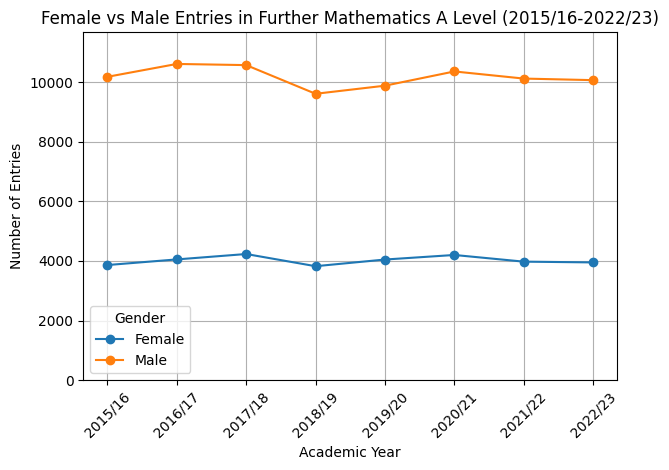

In [50]:
plt.figure(figsize=(12, 6))
fgender_counts.plot(kind='line', marker='o')
plt.title('Female vs Male Entries in Further Mathematics A Level (2015/16-2022/23)')
plt.xlabel('Academic Year')
plt.ylabel('Number of Entries')
plt.ylim(ymin=0, ymax=fgender_counts.max().max() * 1.1)
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid()
plt.tight_layout()
plt.show()

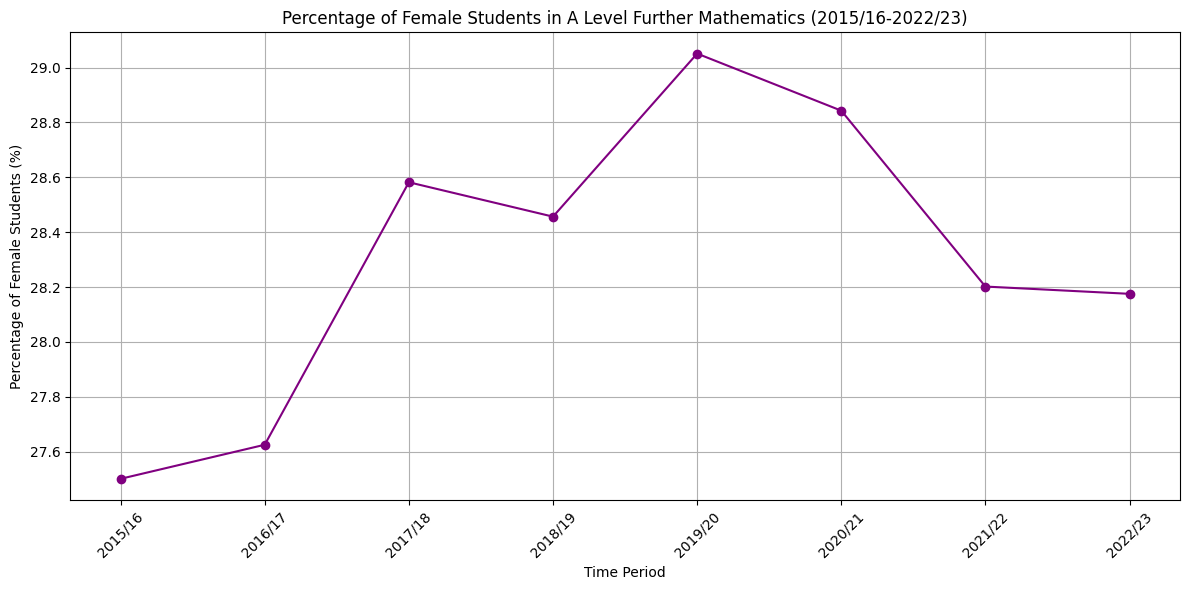

In [55]:
total_fentries = df_fmaths_gender[df_fmaths_gender['characteristic_value'] == 'All students'].groupby('time_period')['entry_count'].sum()
female_fentries = df_fmaths_gender[df_fmaths_gender['characteristic_value'] == 'Female'].groupby('time_period')['entry_count'].sum()

percentage_ffemale = (female_fentries / total_fentries) * 100

percentage_ffemale.index = percentage_ffemale.index.astype(str).str[:4] + '/' + percentage_ffemale.index.astype(str).str[4:]

plt.figure(figsize=(12, 6))
plt.plot(percentage_ffemale.index, percentage_ffemale, marker='o', color='purple')
plt.title('Percentage of Female Students in A Level Further Mathematics (2015/16-2022/23)')
plt.xlabel('Time Period')
plt.ylabel('Percentage of Female Students (%)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()